In [34]:
# Import libraries and modules
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [35]:
# Read data
data = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_SCS_new.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [36]:
# Choose the close price column
price = data['close'].values
price = price.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(price)

In [37]:
# Split the data into training and testing data
train_size = int(len(price_scaled) * 0.8)
test_size = len(price_scaled) - train_size

train_data = price_scaled[:train_size]
test_data = price_scaled[train_size:]

In [38]:
# Function to create dataset with look back
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
# Create the model FCN
model = Sequential()

# Add convolutional layers
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=1, kernel_size=3, activation='relu'))

# Add global average pooling layer
model.add(GlobalAveragePooling1D())

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=64)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1008
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0088
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0046
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0038
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0033
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0034
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0035
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0029
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0030
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0033
E

In [40]:
# Predict on test data
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0]) * 100
msle = mean_squared_log_error(Y_test[0], test_predict[:, 0])

print('RMSE on test dataset:', rmse)
print('MAPE on test dataset:', mape, '%')
print('MSLE on test dataset:', msle)

RMSE on test dataset: 1765.9750421988133
MAPE on test dataset: 1.919116936331631 %
MSLE on test dataset: 0.0005846216022821184


In [42]:
# Function to predict future values
def predict_future(days, last_30_days, model, look_back):
    future_predictions = []
    for i in range(days):
        x = last_30_days[-look_back:].reshape(1, look_back, 1)
        y_hat = model.predict(x)
        future_predictions.append(y_hat)
        last_30_days = np.append(last_30_days, y_hat, axis=0)
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    future_predictions = scaler.inverse_transform(future_predictions)
    return future_predictions

# Predict the next 30, 60, and 90 days
next_30_days = predict_future(30, price_scaled[-look_back:], model, look_back)
next_60_days = predict_future(60, price_scaled[-look_back:], model, look_back)
next_90_days = predict_future(90, price_scaled[-look_back:], model, look_back)

print('Predict for next 30 days: \n', next_30_days)
print('Predict for next 60 days: \n', next_60_days)
print('Predict for next 90 days: \n', next_90_days)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

In [43]:
# Convert data to DataFrame for plotting
test_predict_df = pd.DataFrame(test_predict)
test_predict_index = range(len(train_data)+look_back, len(train_data)+look_back+len(test_predict))
test_predict_df.index = test_predict_index

next_30_days_df = pd.DataFrame(next_30_days)
next_30_index = range(len(data), len(data)+len(next_30_days))
next_30_days_df.index = next_30_index

next_60_days_df = pd.DataFrame(next_60_days)
next_60_index = range(len(data), len(data)+len(next_60_days))
next_60_days_df.index = next_60_index

next_90_days_df = pd.DataFrame(next_90_days)
next_90_index = range(len(data), len(data)+len(next_90_days))
next_90_days_df.index = next_90_index


train_data_df = data[:train_size][['close']]
test_data_df = data[train_size:train_size + test_size][['close']]

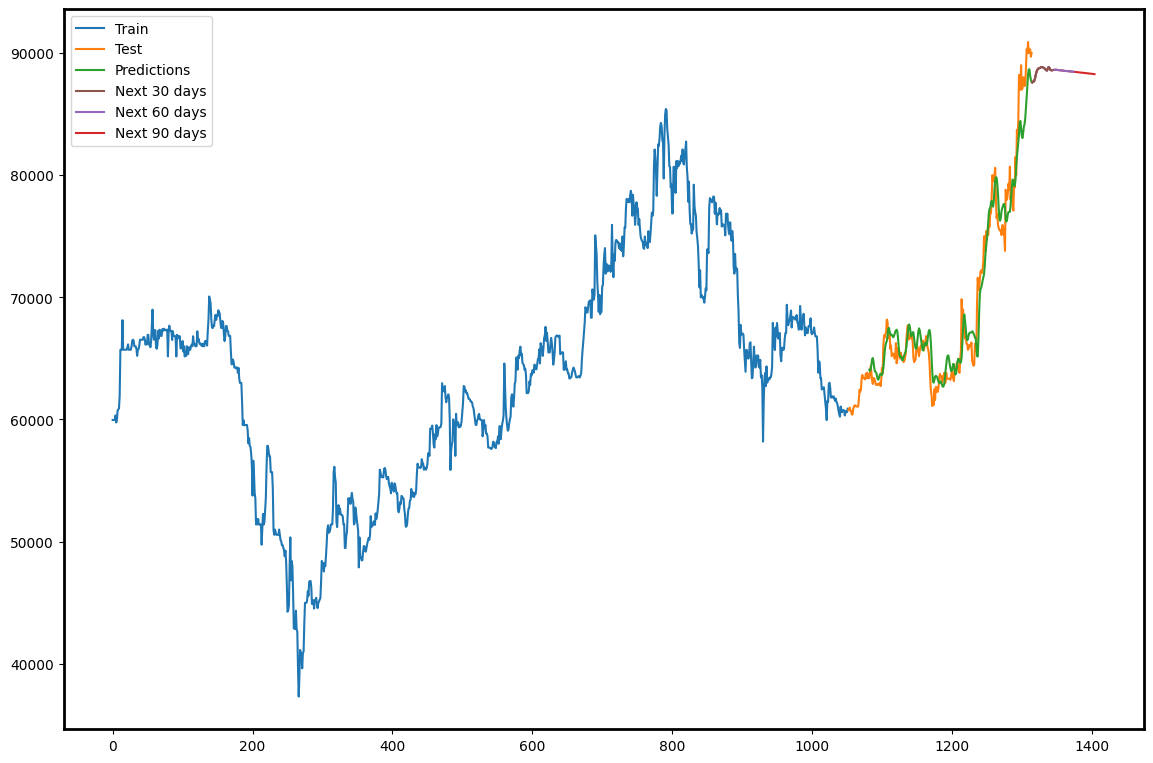

In [44]:
# Plot the results
plt.figure(figsize=(12, 8))
line1, = plt.plot(train_data_df, label='Train')
line2, = plt.plot(test_data_df, label='Test')
line3, = plt.plot(test_predict_df, label='Predictions')
line4, = plt.plot(next_90_days_df, label='Next 90 days')
line5, = plt.plot(next_60_days_df, label='Next 60 days')
line6, = plt.plot(next_30_days_df, label='Next 30 days')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
   
plt.legend()
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.show()